0.028427986842764805


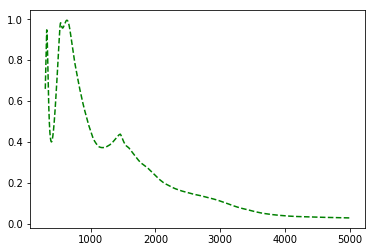

In [3]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from scipy.optimize import minimize

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
d1 = 530e-9/(4*1.45)
d2 = 530e-9/(4*2.4)
structure = {
        ### computation mode - inline means the structure and calculation
        ### type will be determined from the values of this dictionary
        'mode': 'Inline',
        ### temperature of the structure - relevant for all thermal applications
        ### value is stored in attribute self.T
        'Temperature': 2400,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List' : ['Air', 'SiO2', 'SiO2', 'TiO2', 'SiO2', 'TiO2','W','Air'], 
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d 6.00600166e-10 2.68115351e-08
        'Thickness_List': [0, 10e-9,  d1, d2, d1, d2, 900e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [300e-9, 5000e-9, 5000],
         ### The folloing entry will tell the computer to use the lightbulb functions to
         ### compute properties needed to characterize an incandescent source
         'LIGHTBULB': 1
     
        }

### create the instance called coated_w_slab that is the "base" structure we 
### wish to evaluate
coated_w_slab = multilayer(structure)
current_efficiency = coated_w_slab.luminous_efficiency_val
print(current_efficiency)

c = 299792458
layer = 1
omega_0 = 2*np.pi*c/530e-9
gamma = 2*np.pi*c/7000e-9
omega_p = 2*np.pi*c/1000e-9
#def layer_lorentz(self, layer, omega_p, omega_0, gamma)

coated_w_slab.layer_lorentz(layer, omega_p, omega_0, gamma)
RI_L = coated_w_slab.layer_ri(layer)
coated_w_slab.fresnel()
plt.plot(coated_w_slab.lambda_array*1e9, coated_w_slab.emissivity_array, 'g--')
#plt.plot(coated_w_slab.lambda_array*1e9, np.real(RI_L))
#plt.plot(coated_w_slab.lambda_array*1e9, np.imag(RI_L))
plt.show()


In [4]:
def objective(x):
    val1 = x[0]
    val2 = x[1]
    omega0 = x[2]  #2*np.pi*c/530e-9
    gamma_val = x[3]    #2*np.pi*c/7000e-9
    omegap = x[4]  #2*np.pi*c/1000e-9
    coated_w_slab.d[2] = val1
    coated_w_slab.d[4] = val1
    coated_w_slab.d[3] = val2
    coated_w_slab.d[5] = val2
    coated_w_slab.layer_lorentz(1, omegap, omega0, gamma_val)
    coated_w_slab.fresnel()
    coated_w_slab.thermal_emission()
    coated_w_slab.luminous_efficiency()
    return (1 - coated_w_slab.luminous_efficiency_val)
    #return (val-10)**2

In [5]:
x0 = np.array([d1, d2, 2*np.pi*c/530e-9, 2*np.pi*c/700e-9, 2*np.pi*c/1000e-9])
print(x0)
print(objective(x0))
#print(objective_der(x0))
#res = minimize(objective, x0, method='BFGS', jac=objective_der, options={'gtol': 1e0, 'disp': True})
res = minimize(objective, x0, method='nelder-mead', options={'xtol': 1e-10, 'disp': True})
print(res.x)
print(objective(res.x))
#print(objective_der(res.x))

[9.13793103e-08 5.52083333e-08 3.55405956e+15 2.69093081e+15
 1.88365157e+15]
0.9718144904278604


KeyboardInterrupt: 